In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# EDA

Nuestro objetivo principal es revelar patrones ocultos, tendencias, relaciones y posibles anomalías en los datos. A través de visualizaciones y técnicas descriptivas, en el EDA buscamos proporcionar una comprensión sólida de los datos, lo que facilita la toma de decisiones informadas y la identificación de áreas clave para un análisis más profundo.

cargamos los datos

In [2]:
df_games=pd.read_csv('dataset\df_games_limpio.csv')
df_items=pd.read_csv('dataset\df_items_limpio.csv')
df_reviews=pd.read_csv('dataset\df_reviews_limpio.csv')

In [63]:
plt.rcParams['figure.figsize']=(16.0,6.0)

In [28]:
df_reviews.head(2)

,user_id,user_url,item_id,recommend,review,date
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,1,2,2011-11-05
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,1,2,2011-07-15


para empezar me gustaria estudiar el dataset reviews que muestra reseñas por usuario en especifico me gustaria ver la cantidad de reseñas que genera un  usuario  promedio pero solo usare los primeros 1000 registros como muestra ya que de encontrar que un pequeño grupo de usuarios elabora la gran mayoria de reseñas significaria un sesgo importante a la hora de medir la calificacion de los titulos

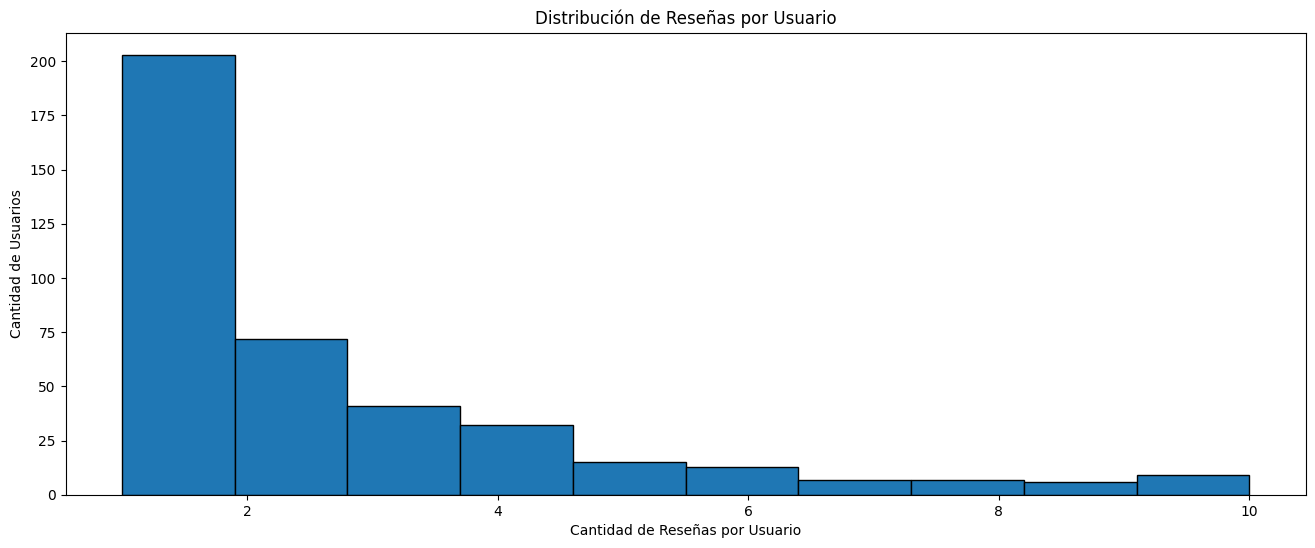

In [132]:
user_reviews_count = df_reviews['user_id'].head(1000).value_counts()
plt.hist(user_reviews_count, bins=10, edgecolor='black')  
plt.xlabel('Cantidad de Reseñas por Usuario')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Reseñas por Usuario')
plt.show()

vemos que la mayoria de los usuarios contribuye entre una o dos veces  lo cual es muy bueno para la calidad de la informacion contenida en los datos

ahora me gustaria ver la distribucion de estas reseñas a lo largo del tiempo con el fin de ver la importancia de las valoraciones a una empresa a lo largo del tiempo

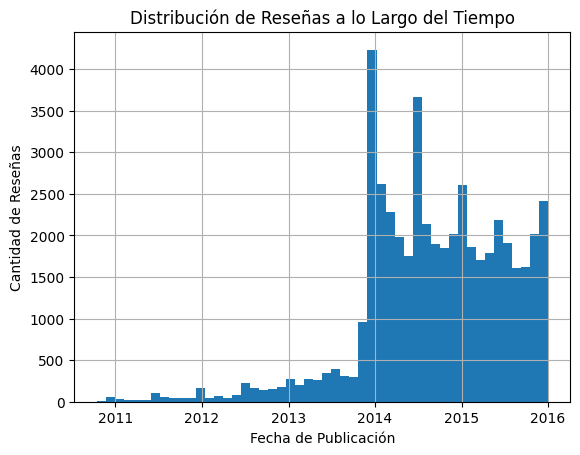

In [30]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

df_reviews['date'].hist(bins=50)
plt.xlabel('Fecha de Publicación')
plt.ylabel('Cantidad de Reseñas')
plt.title('Distribución de Reseñas a lo Largo del Tiempo')
plt.show()

como podemos notar aproximadamente  a partir del 2014 se genera un cambio en la cantidad de reseñas que los usuarios aportan a los juegos lo que quiere decir que a partir de ese año las empresas reciben mejor feedback proviniente de los usuarios 

In [19]:
df_games.head()

,developer,app_name,release_date,id,genres,price
0,kotoshiro,lost summoner kitty,2018-01-04,761140,"['strategy', 'action', 'indie', 'casual', 'sim...",4.99
1,secret level srl,ironbound,2018-01-04,643980,"['free to play', 'strategy', 'indie', 'rpg', '...",0.00
2,poolians.com,real pool 3d - poolians,2017-07-24,670290,"['free to play', 'simulation', 'sports', 'casu...",0.00
3,彼岸领域,弹炸人2222,2017-12-07,767400,"['action', 'adventure', 'casual']",0.99
4,NaN,log challenge,NaN,773570,"['action', 'indie', 'casual', 'sports']",2.99


Ahora me gustaria ver la direccion en la cual las empresas desarrolladoras apuntan a la hora de crear un juego y una buena forma de hacerlo es con una nube de palabras

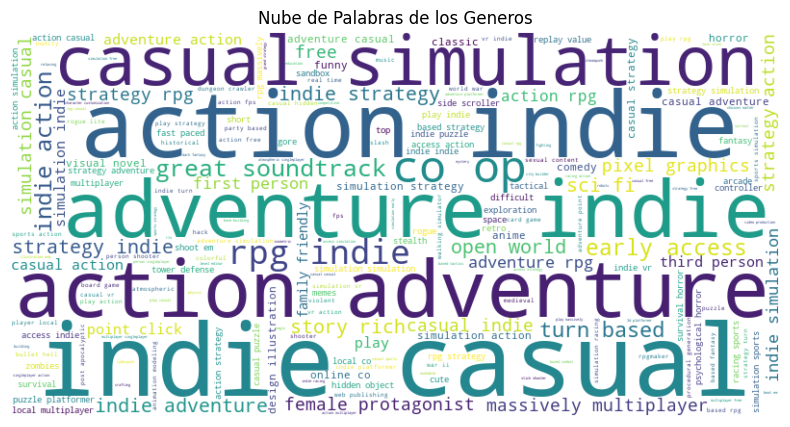

In [47]:
# Combinar todas las reseñas en un solo texto
genres_text = ' '.join(df_games['genres'].dropna().apply(lambda x: ' '.join(eval(x))))

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Mostrar la nube de palabras en un gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.title('Generos populares entre las desarrolladoras')
plt.show()

me gustaria compararlo con los generos mas de moda entre los usuarios. para eso voy a mapear los ids de los juegos con los generos a los que pertenecen

In [3]:
id_to_genre = df_games.dropna(subset='genres').set_index('id')['genres'].to_dict()

creo y aplico la funcion que me obtenga los generos de los juegos

In [4]:
def get_all_genres(item_id):
    return id_to_genre.get(item_id,[])

In [5]:
df_items['genres']=df_items['item_id'].apply(get_all_genres)

confirmamos que todo haya salido bien

In [52]:
df_items.head()

,user_id,user_url,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks,genres
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277,76561197970982479,10,counter-strike,6,0,"['action', 'fps', 'multiplayer', 'shooter', 'c..."
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277,76561197970982479,20,team fortress classic,0,0,"['action', 'fps', 'multiplayer', 'classic', 's..."
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277,76561197970982479,30,day of defeat,7,0,"['fps', 'world war ii', 'multiplayer', 'action..."
3,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277,76561197970982479,40,deathmatch classic,0,0,"['action', 'fps', 'multiplayer', 'classic', 's..."
4,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277,76561197970982479,50,half-life: opposing force,0,0,"['fps', 'action', 'sci-fi', 'singleplayer', 'c..."


ahora necesito las palabras en la colomnas genres asi que uso el mismo metodo de antes pero con unos pequeños cambios

In [6]:
#defino una funcion que trata de aplicar eval() y si falla devuelve []
def try_eval(x):
    try:
        return eval(x)
    except Exception as e:
        #print(f"Error en valor: {x}")
        #print(e)
        return []

aplico try_eval

In [7]:
df_items['genres'] = df_items['genres'].apply(try_eval)

In [8]:
# Combinar todas los generos  en un solo texto
genres_text = ' '.join(df_items['genres'].dropna().apply(lambda x: ' '.join(x)))


como genres_text contiene demasiadas palabras para poder procesarlas tomare una muestra de 5000 palabras  aleatorias en genres_text

In [12]:
muestra=random.sample(genres_text.split(), 5000)

ahora unire las 5000 palabras en un solo texto para crear la nube de palabras

In [16]:
nuevo_texto = ' '.join(muestra)

Text(0.5, 1.0, 'Generos populares entre los usuarios')

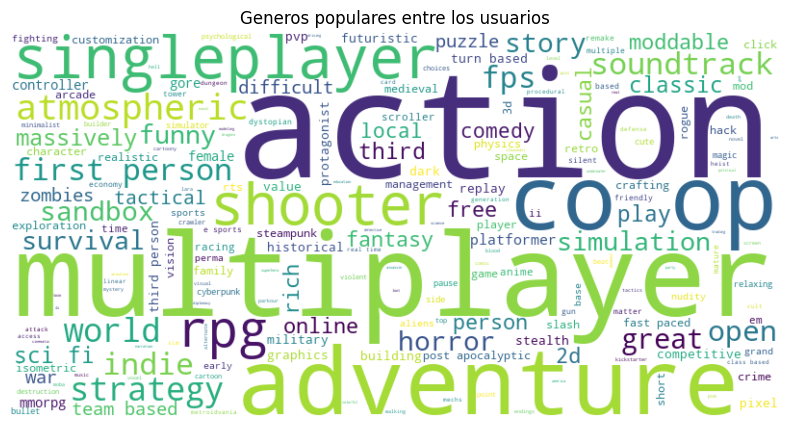

In [18]:

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nuevo_texto)

# Mostrar la nube de palabras en un gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.title('Generos populares entre los usuarios')

vemos que a pesar de que el genero action sigue estando entre los generos dominantes sigue estando action vemos que la categoria multiplayer cobra una gran fuerza entre los usuarios

se suele creer que el precio en estos items digitales han tenido una revalorizacion anormalmente grande en los ultimos años y me gustaria comprobar esta teoria detectando anomalias en los precios a traves de los años

In [133]:
df_games['año_lanzamiento']=df_games['release_date'].str.extract(r'(\d{4})')

<Axes: xlabel='año_lanzamiento'>

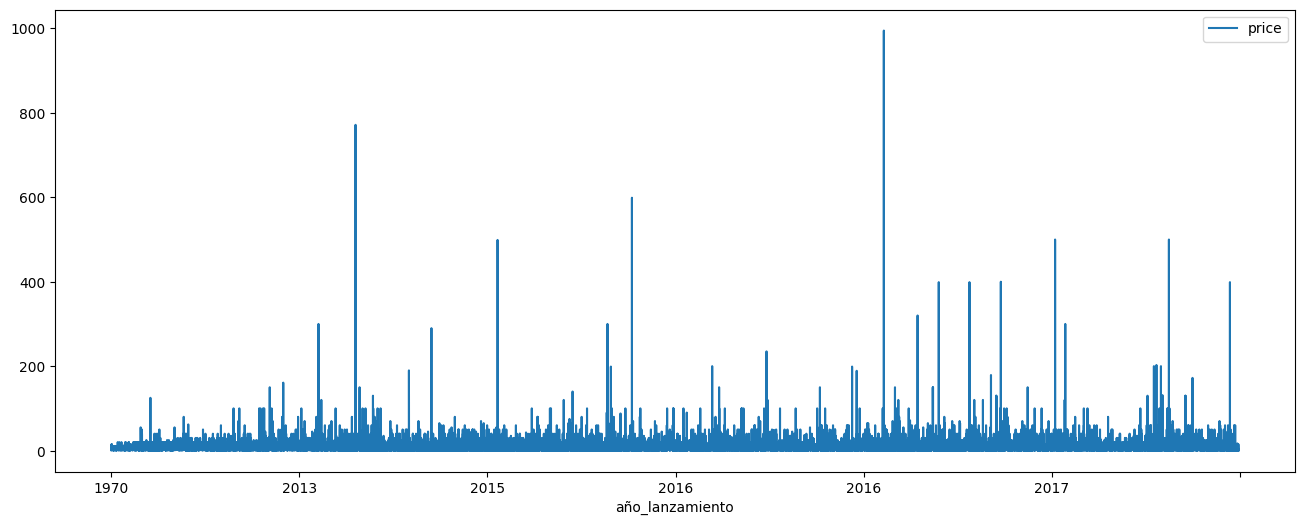

In [139]:
df_precio_anual=df_games[['año_lanzamiento','price']].dropna().sort_values(by='año_lanzamiento').set_index('año_lanzamiento')
df_precio_anual.plot()

aunque una tendencia  alcista no se notan picos demasiado prominentes en los datos(como se aprecia el precio en los ultimos años tiene un bajon pero esto se puede deber a los pocos items registrados esos años asi que no tomare en cuenta si existen anomalias despues de 2018)

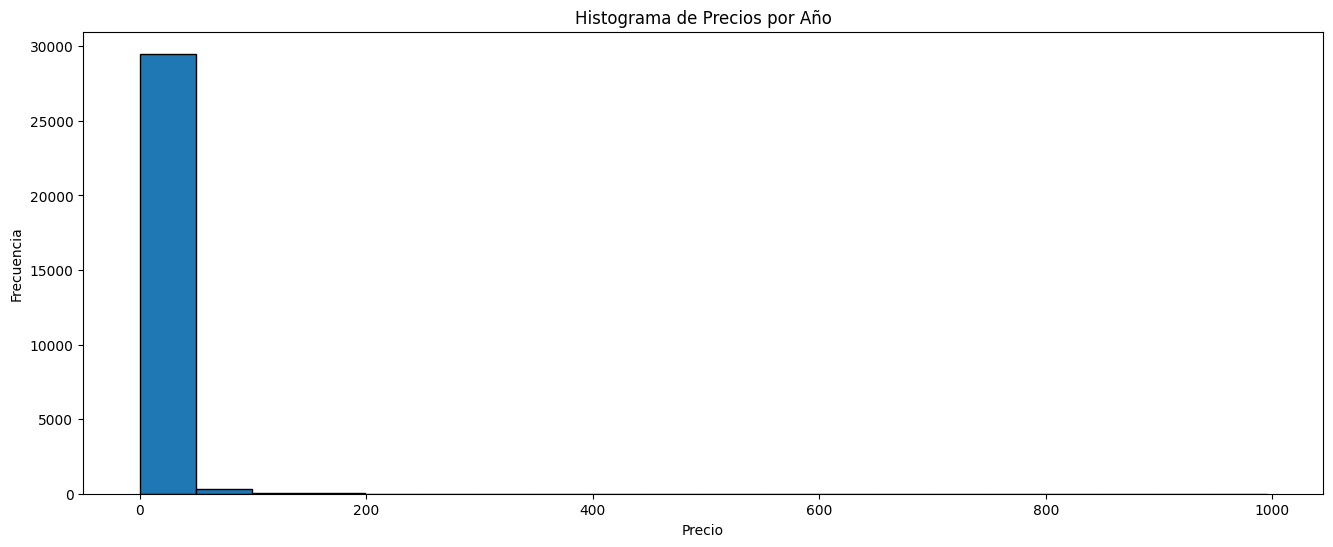

In [140]:
plt.hist(df_precio_anual['price'], bins=20, edgecolor='black')  # Puedes ajustar el número de bins según tus necesidades
plt.title('Histograma de Precios por Año')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

vemos que la distribucion de precios va desde los 0 a los 50 dolares aproximadamente

In [153]:
#defino una ventana de espacio
wind=30
#tomo el sigma 3 aunque tal vez pude tomar uno un poco mayor por lo dispersos de los datos
sigma=5
#defino el suelo y el techo de mi grafica
df_precio_anual['suelo']=df_precio_anual['price'].rolling(window=wind).mean()-(sigma*df_precio_anual['price'].rolling(window=wind).std())
df_precio_anual['techo']=df_precio_anual['price'].rolling(window=wind).mean()+(sigma*df_precio_anual['price'].rolling(window=wind).std())

<Axes: xlabel='año_lanzamiento'>

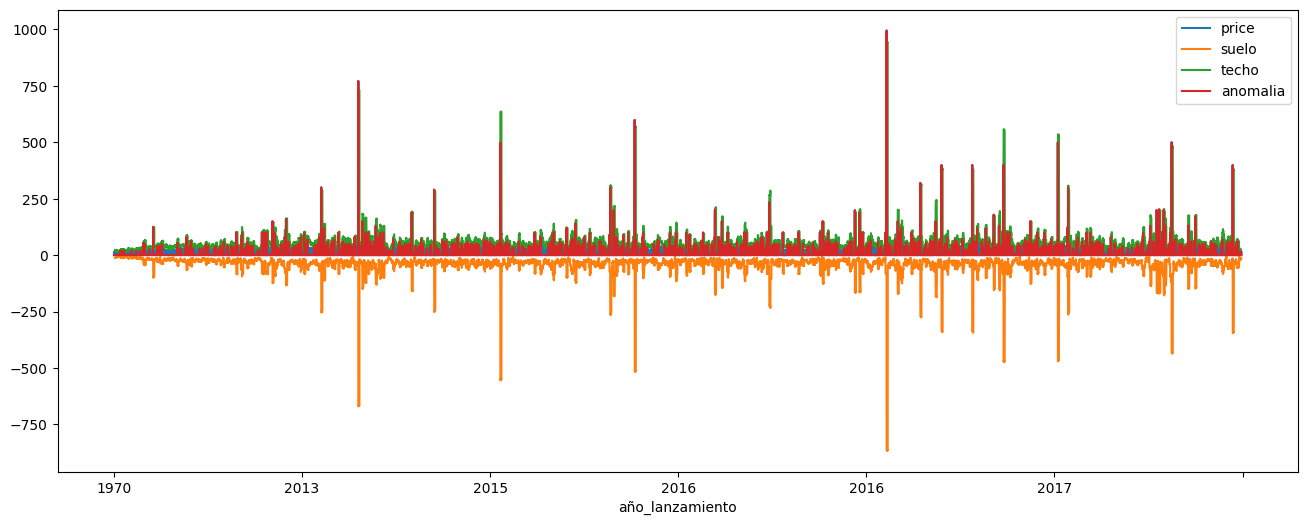

In [154]:
df_precio_anual.plot()

<Axes: xlabel='año_lanzamiento'>

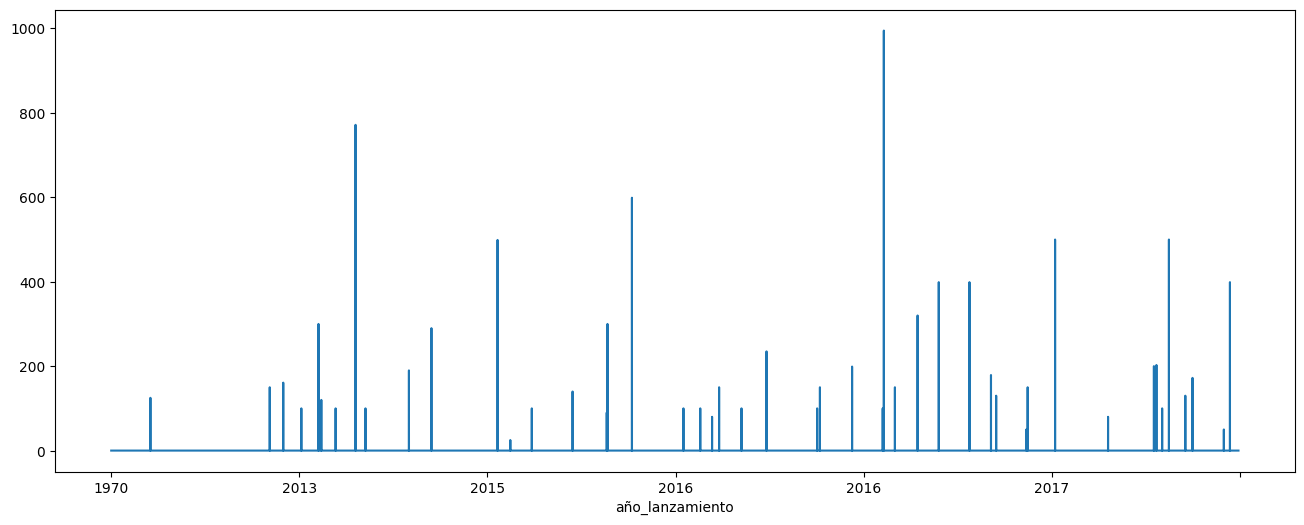

In [155]:
#defino una anomalia como el punto donde la grafica alcanza su suelo o su techo
df_precio_anual['anomalia']=df_precio_anual.apply(
    lambda row: row['price'] if (row['price']<=row['suelo'] or row['price']>=row['techo']) else 0, axis=1
)
df_precio_anual['anomalia'].plot()

los datos demostran que las anomalias en los precios han seguido ocurriendo con cierta regularidad y aunque se ven cada vez anomalias mas altas esto es completamente normal por la naturaleza alcista del grafico de precios 